# Librerías

In [661]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import numpy as np
# librerías de estadistica
import statsmodels.api as sm
import statsmodels.stats.diagnostic as sms
from patsy import dmatrices
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
from statsmodels.graphics import utils
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.formula.api import ols
import random
from scipy import stats

In [662]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [663]:
data_dir = 'Data'
# X_train
filename = os.path.join(data_dir,'x_train.pkl')
open_file = open(filename, "rb")
X_train = pickle.load(open_file)
open_file.close()

# X_test
filename = os.path.join(data_dir,'x_test.pkl')
open_file = open(filename, "rb")
X_test = pickle.load(open_file)
open_file.close()

#y_train
filename = os.path.join(data_dir,'y_train.pkl')
open_file = open(filename, "rb")
y_train = pickle.load(open_file)
open_file.close()

#y_test
filename = os.path.join(data_dir,'y_test.pkl')
open_file = open(filename, "rb")
y_test = pickle.load(open_file)
open_file.close()

In [664]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 1013 to 1126
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             1335 non-null   int64  
 1   population        1335 non-null   float64
 2   householdsize     1335 non-null   float64
 3   racepctblack      1335 non-null   float64
 4   racePctWhite      1335 non-null   float64
 5   racePctAsian      1335 non-null   float64
 6   racePctHisp       1335 non-null   float64
 7   agePct12t21       1335 non-null   float64
 8   agePct12t29       1335 non-null   float64
 9   agePct16t24       1335 non-null   float64
 10  agePct65up        1335 non-null   float64
 11  medIncome         1335 non-null   float64
 12  perCapInc         1335 non-null   float64
 13  whitePerCap       1335 non-null   float64
 14  blackPerCap       1335 non-null   float64
 15  indianPerCap      1335 non-null   float64
 16  AsianPerCap       1335 non-null   float

In [668]:
data = pd.concat([X_train, y_train], axis=1, join='inner')

# Selección de variables para el modelo

In [669]:
f_complete = '''ViolentCrimesPerPop ~  population + householdsize + racepctblack + racePctWhite + racePctAsian 
+ racePctHisp + agePct12t21 + agePct12t29 + agePct16t24 + agePct65up + medIncome + perCapInc + whitePerCap + blackPerCap
+ indianPerCap + AsianPerCap + OtherPerCap + HispPerCap + PctPopUnderPov + PctLess9thGrade + PctNotHSGrad + PctBSorMore
+ PctUnemployed + TotalPctDiv + PersPerFam + PctFam2Par + PctWorkMom + PctPersDenseHous + NumInShelters + NumStreet
+ PopDens + PctUsePubTrans 
'''

In [670]:
#y, X = dmatrices('msrp ~ .', data=data, return_type='dataframe')
y, X = dmatrices(f_complete, data, return_type='dataframe')

In [671]:
y

,ViolentCrimesPerPop
1013,0.02
380,0.49
1027,0.01
1682,0.06
84,0.03
...,...
1130,0.09
1294,0.15
860,0.13
1459,0.37


In [672]:
X

,Intercept,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctUnemployed,TotalPctDiv,PersPerFam,PctFam2Par,PctWorkMom,PctPersDenseHous,NumInShelters,NumStreet,PopDens,PctUsePubTrans
1013,1.0,0.01,0.56,0.02,0.95,0.15,0.01,0.48,0.33,0.27,...,0.17,0.11,0.49,0.93,0.44,0.01,0.00,0.00,0.14,0.01
380,1.0,0.11,0.36,0.19,0.68,0.09,0.34,0.41,0.52,0.36,...,0.57,0.69,0.47,0.25,0.42,0.19,0.10,0.00,0.67,0.41
1027,1.0,0.00,0.66,0.01,0.98,0.05,0.01,0.36,0.36,0.24,...,0.22,0.19,0.65,0.94,0.47,0.03,0.00,0.00,0.06,0.29
1682,1.0,0.00,0.72,0.09,0.92,0.05,0.01,1.00,1.00,1.00,...,0.50,0.09,0.20,0.61,0.70,0.10,0.01,0.00,0.20,0.02
84,1.0,0.00,0.65,0.01,0.91,0.09,0.02,1.00,1.00,1.00,...,0.43,0.19,0.39,0.54,0.60,0.11,0.00,0.00,0.27,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1.0,0.01,0.38,0.24,0.68,0.40,0.08,0.36,0.55,0.35,...,0.22,0.47,0.44,0.75,0.48,0.12,0.03,0.00,0.19,0.13
1294,1.0,0.05,0.24,0.07,0.90,0.09,0.14,0.22,0.31,0.18,...,0.31,0.42,0.23,0.68,0.67,0.12,0.00,0.00,0.41,0.05
860,1.0,0.01,0.29,0.03,0.94,0.06,0.07,0.23,0.34,0.19,...,0.21,0.39,0.33,0.71,0.67,0.04,0.00,0.00,0.36,0.09
1459,1.0,0.09,0.28,0.11,0.61,0.85,0.28,0.24,0.37,0.22,...,0.31,0.64,0.35,0.58,0.60,0.24,0.01,0.01,0.43,0.52


# Modelo dummy

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.PredictionResults.html#statsmodels.regression.linear_model.PredictionResults

## Multicolinealidad

In [673]:
dummy_model = sm.OLS(y, X).fit()

In [674]:
np.linalg.cond(dummy_model.model.exog)

158.25613849812723

In [675]:
X

,Intercept,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctUnemployed,TotalPctDiv,PersPerFam,PctFam2Par,PctWorkMom,PctPersDenseHous,NumInShelters,NumStreet,PopDens,PctUsePubTrans
1013,1.0,0.01,0.56,0.02,0.95,0.15,0.01,0.48,0.33,0.27,...,0.17,0.11,0.49,0.93,0.44,0.01,0.00,0.00,0.14,0.01
380,1.0,0.11,0.36,0.19,0.68,0.09,0.34,0.41,0.52,0.36,...,0.57,0.69,0.47,0.25,0.42,0.19,0.10,0.00,0.67,0.41
1027,1.0,0.00,0.66,0.01,0.98,0.05,0.01,0.36,0.36,0.24,...,0.22,0.19,0.65,0.94,0.47,0.03,0.00,0.00,0.06,0.29
1682,1.0,0.00,0.72,0.09,0.92,0.05,0.01,1.00,1.00,1.00,...,0.50,0.09,0.20,0.61,0.70,0.10,0.01,0.00,0.20,0.02
84,1.0,0.00,0.65,0.01,0.91,0.09,0.02,1.00,1.00,1.00,...,0.43,0.19,0.39,0.54,0.60,0.11,0.00,0.00,0.27,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1.0,0.01,0.38,0.24,0.68,0.40,0.08,0.36,0.55,0.35,...,0.22,0.47,0.44,0.75,0.48,0.12,0.03,0.00,0.19,0.13
1294,1.0,0.05,0.24,0.07,0.90,0.09,0.14,0.22,0.31,0.18,...,0.31,0.42,0.23,0.68,0.67,0.12,0.00,0.00,0.41,0.05
860,1.0,0.01,0.29,0.03,0.94,0.06,0.07,0.23,0.34,0.19,...,0.21,0.39,0.33,0.71,0.67,0.04,0.00,0.00,0.36,0.09
1459,1.0,0.09,0.28,0.11,0.61,0.85,0.28,0.24,0.37,0.22,...,0.31,0.64,0.35,0.58,0.60,0.24,0.01,0.01,0.43,0.52


El número de condición de la matriz $X'X$ 2276.288 indica que tenemos un problema de multicolinealidad. Por lo que vamos a estudiar la correlación entre los regresores y veremos si podemos eliminar aquellos que esten altamente correlacionados. 
- dado que tenemos un número de condición muy alto en la matriz $X'X$ es posible que tengamos problemas de multicolinealidad

Tenemos las siguiente variables relacionadas a la edad de la población:
- agePct12t21: percentage of population that is 12-21 in age (numeric - decimal)
- agePct12t29: percentage of population that is 12-29 in age (numeric - decimal)
- agePct16t24: percentage of population that is 16-24 in age (numeric - decimal)
- agePct65up: percentage of population that is 65 and over in age (numeric - decimal)
de las cuales agePct12t21,agePct12t29,agePct16t24 estan altamente correlacionada, por lo que consideramos que debemos eliminarlas, sin embargo tomamos en cuenta la siguiente información para elegir la variable que dejaremos en el modelo. 
La delincuencia juvenil comienza entre los 13 y los 14 años; los hurtos en tiendas y vandalismo sobre los 11 años; el robo y los robos de vehículos de motor entre los 14 y los 15 años; y los delitos sexuales y el tráfico de drogas entre los 17 y los 19 años. Los jóvenes condenados en edades más tempranas (10-13 años) se convierten en delincuentes más persistentes, por lo que una edad de inicio temprana predice una carrera antisocial larga y grave. Tres cuartas partes de los condenados como delincuentes juveniles entre los 10 y los 16 años, volvieron a ser condenados entre los 17 y los 24 años. Y casi la mitad volvieron a ser condenados entre los 25 y los 32 años. Sólo un 8% no volvió a ser condenado. Por lo que el número de delitos juveniles predicen el número de delitos adultos. (Farrington, D. 2006. «Criminología del desarrollo y del curso de la vida», a Guzmán Dábora et al. (Eds.) Derecho penal y criminología como fundamento de la política criminal, pp. 239-266.)

Por otro lado tenemos las siguientes variables relacionados con el ingreso per cápita:
- medIncome: median household income (numeric - decimal)
- perCapInc: per capita income (numeric - decimal)
- whitePerCap: per capita income for caucasians (numeric - decimal) # primero (ver si se pueden quitar)
- blackPerCap: per capita income for african americans (numeric - decimal)
- indianPerCap: per capita income for native americans (numeric - decimal)
- AsianPerCap: per capita income for people with asian heritage (numeric - decimal)
- OtherPerCap: per capita income for people with 'other' heritage (numeric - decimal)
- HispPerCap: per capita income for people with hispanic heritage (numeric - decimal)
las cuales estan altamente correlacionadas. El perCapInc esta desglosado en el ingreso per cápita para cada uno de los grupos de población (raza/etnia), por lo que consideremos quedarnos con estas variables y eliminar la variable global perCapInc.

In [676]:
del X['perCapInc']
del X['agePct12t21']
del X['agePct16t24']

In [677]:
# numero de condicion de la matriz
dummy_model = sm.OLS(y, X).fit()
np.linalg.cond(dummy_model.model.exog)
 # con analisis de fer podemos ver si quitamos otras variables altamente correlacionadas

96.03148004604418

## modelo de minimos cuadrados

In [678]:
p = len(X.columns)
n = len(y)

In [679]:
print("numero de regresores",p)
print("numero de variables",n)

numero de regresores 30
numero de variables 1334


In [680]:
print(dummy_model.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.654
Model:                             OLS   Adj. R-squared:                  0.647
Method:                  Least Squares   F-statistic:                     85.16
Date:                 Sun, 29 May 2022   Prob (F-statistic):          2.12e-276
Time:                         12:56:22   Log-Likelihood:                 726.10
No. Observations:                 1334   AIC:                            -1392.
Df Residuals:                     1304   BIC:                            -1236.
Df Model:                           29                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5294   

**Explicacion del summary**:
- R-squared:
- Adj. R-squared
- F-stastic
- AIC:
- BIC

In [681]:
dummy_model.params

Intercept           0.529425
population          0.081960
householdsize       0.015426
racepctblack        0.261329
racePctWhite       -0.044792
racePctAsian       -0.034129
racePctHisp         0.072127
agePct12t29        -0.041013
agePct65up          0.023894
medIncome           0.124271
whitePerCap        -0.119537
blackPerCap        -0.011211
indianPerCap       -0.039469
AsianPerCap         0.040264
OtherPerCap         0.027083
HispPerCap          0.050827
PctPopUnderPov     -0.021984
PctLess9thGrade    -0.263287
PctNotHSGrad        0.244680
PctBSorMore         0.029386
PctUnemployed      -0.079509
TotalPctDiv         0.096744
PersPerFam         -0.060612
PctFam2Par         -0.527246
PctWorkMom         -0.128641
PctPersDenseHous    0.240826
NumInShelters      -0.004270
NumStreet           0.290451
PopDens            -0.012829
PctUsePubTrans     -0.004059
dtype: float64

In [684]:
#dummy_model.tvalues

## Análisis del residuo

In [711]:
influence = dummy_model.get_influence()

In [712]:
residuos_studentizados = influence.resid_studentized

In [713]:
residuos_studentizados

array([ 0.02043257,  0.31173485,  0.09300961, ...,  0.14497686,
        0.68783776, -0.7975243 ])

In [714]:
residuos_train = dummy_model.resid

In [715]:
residuos_train 

1013    0.002867
380     0.043822
1027    0.012867
1682    0.004729
84     -0.054978
          ...   
1130   -0.065724
1294   -0.030742
860     0.020498
1459    0.096526
1126   -0.112075
Length: 1334, dtype: float64

In [689]:
prediccion_train = dummy_model.predict(X)

In [702]:
np.where(prediccion_train<0)[0]

array([   2,   15,   22,   30,   62,   74,   81,  131,  174,  260,  309,
        340,  361,  437,  474,  482,  483,  494,  585,  619,  658,  733,
        767,  785,  792,  821,  850,  931,  969, 1028, 1048, 1082, 1106,
       1108, 1126, 1209, 1222, 1226, 1266, 1282])

In [695]:
np.where(y<0)

(array([], dtype=int64), array([], dtype=int64))

In [703]:
prediccion_train

1013    0.017133
380     0.446178
1027   -0.002867
1682    0.055271
84      0.084978
          ...   
1130    0.155724
1294    0.180742
860     0.109502
1459    0.273474
1126    0.282075
Length: 1334, dtype: float64

### Residuos (pruebas de normalidad y deteccion de extremos)

Text(0.5, 0.98, 'Diagnóstico residuos')

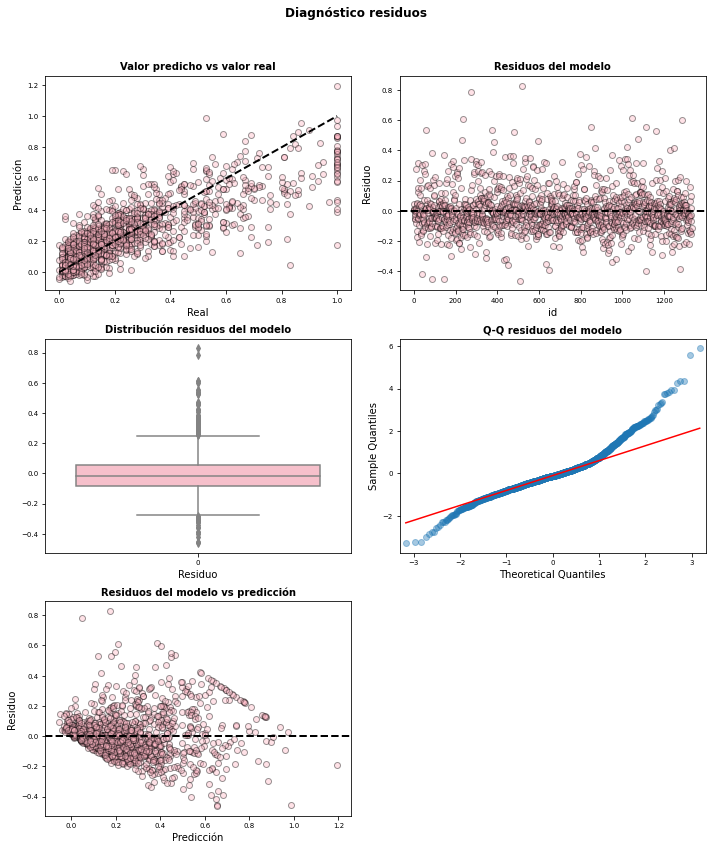

In [704]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

axes[0, 0].scatter(y, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4,color = '#FFB7C5')
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4, color = '#FFB7C5')
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.boxplot(
    data    = residuos_train,
    color   = "#FFB7C5",
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = '#FFB7C5',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,color = '#FFB7C5',
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold")

**Análisis**
- Por la grafica de Residuos del modelo vs predicción parace que existen puntos extemos.

### Residuos (validación de supuestos)
- varianza constante
- transformación de las x´s que explican mejor 
- la no normalidad y varianza no constante se corrie mediante trasnformaciones

tipo de transformaciones que podemos hacer: 


In [540]:
cols = list(X.columns)

In [600]:
#cols

### residuos vs x´s

Conclusión: 



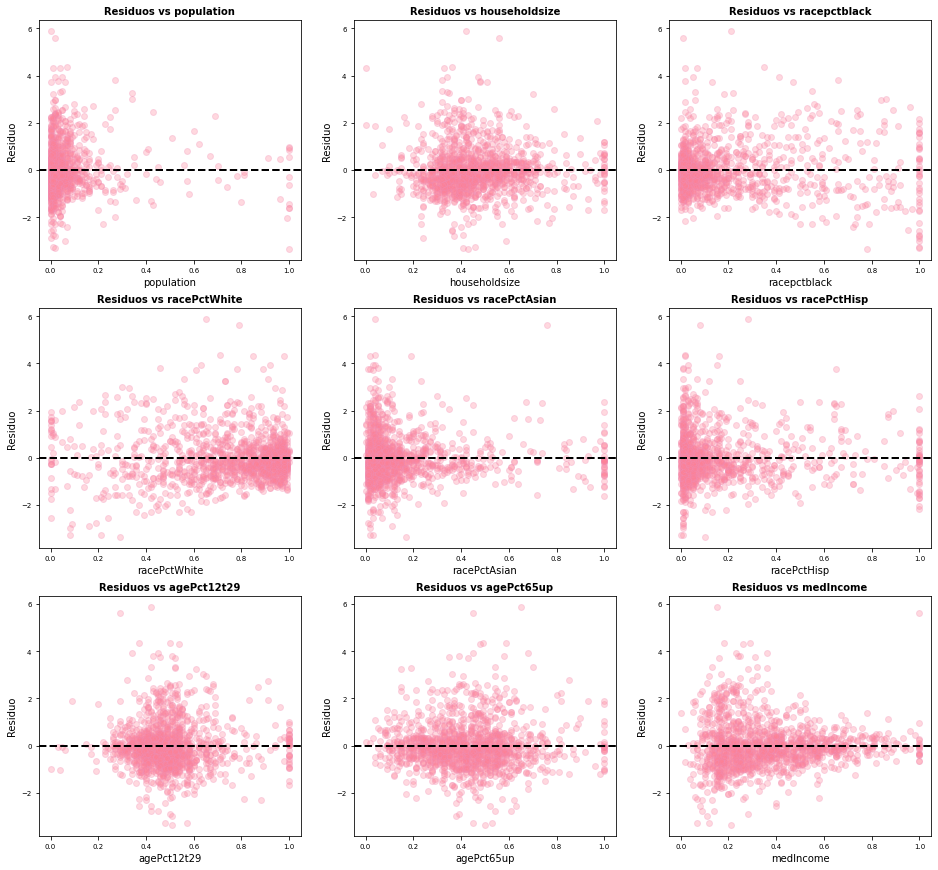

In [718]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 15))
col = cols[1]
axes[0,0].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[0,0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0,0].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[0,0].set_xlabel(f'{col}')
axes[0,0].set_ylabel('Residuo')
axes[0,0].tick_params(labelsize = 7)

### 2
col = cols[2]
axes[0,1].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[0,1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0,1].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[0,1].set_xlabel(f'{col}')
axes[0,1].set_ylabel('Residuo')
axes[0,1].tick_params(labelsize = 7)

### 3
col = cols[3]
axes[0,2].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[0,2].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0,2].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[0,2].set_xlabel(f'{col}')
axes[0,2].set_ylabel('Residuo')
axes[0,2].tick_params(labelsize = 7)

### 4
col = cols[4]
axes[1,0].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[1,0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1,0].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[1,0].set_xlabel(f'{col}')
axes[1,0].set_ylabel('Residuo')
axes[1,0].tick_params(labelsize = 7)

### 5
col = cols[5]
axes[1,1].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[1,1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1,1].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[1,1].set_xlabel(f'{col}')
axes[1,1].set_ylabel('Residuo')
axes[1,1].tick_params(labelsize = 7)

### 6
col = cols[6]
axes[1,2].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[1,2].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1,2].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[1,2].set_xlabel(f'{col}')
axes[1,2].set_ylabel('Residuo')
axes[1,2].tick_params(labelsize = 7)

### 7
col = cols[7]
axes[2,0].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[2,0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2,0].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[2,0].set_xlabel(f'{col}')
axes[2,0].set_ylabel('Residuo')
axes[2,0].tick_params(labelsize = 7)

### 8
col = cols[8]
axes[2,1].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[2,1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2,1].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[2,1].set_xlabel(f'{col}')
axes[2,1].set_ylabel('Residuo')
axes[2,1].tick_params(labelsize = 7)

### 9
col = cols[9]
axes[2,2].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[2,2].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2,2].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[2,2].set_xlabel(f'{col}')
axes[2,2].set_ylabel('Residuo')
axes[2,2].tick_params(labelsize = 7)

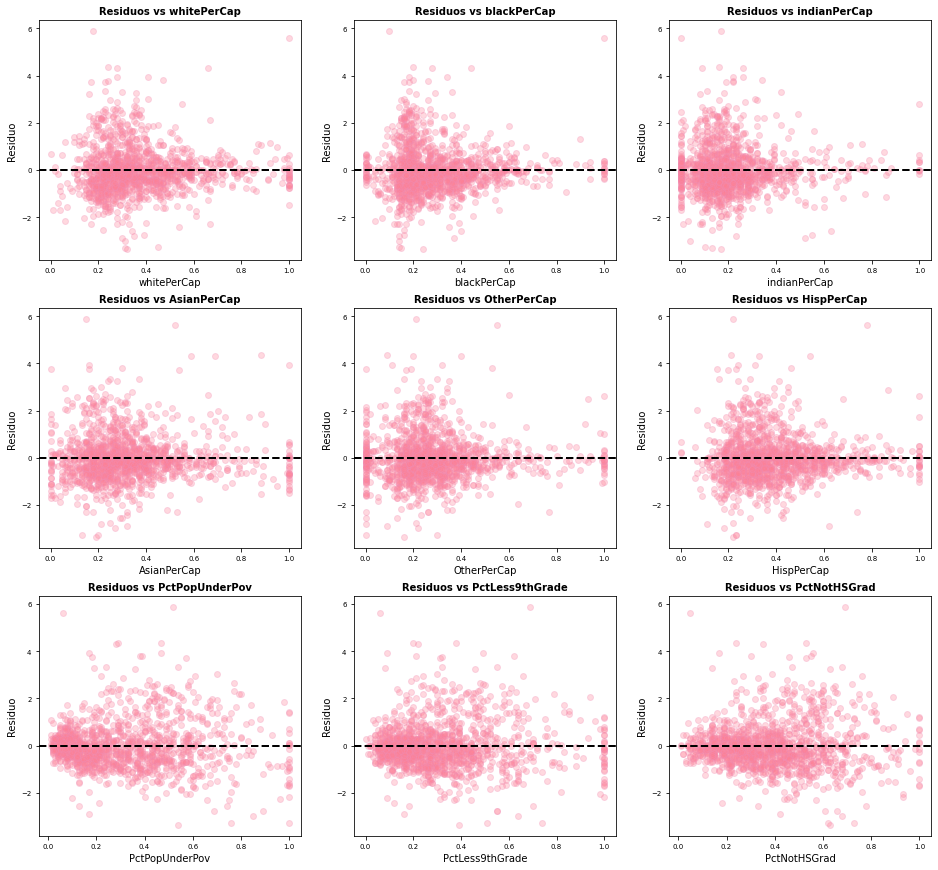

In [719]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 15))
col = cols[10]
axes[0,0].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[0,0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0,0].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[0,0].set_xlabel(f'{col}')
axes[0,0].set_ylabel('Residuo')
axes[0,0].tick_params(labelsize = 7)

### 2
col = cols[11]
axes[0,1].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[0,1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0,1].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[0,1].set_xlabel(f'{col}')
axes[0,1].set_ylabel('Residuo')
axes[0,1].tick_params(labelsize = 7)

### 3
col = cols[12]
axes[0,2].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[0,2].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0,2].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[0,2].set_xlabel(f'{col}')
axes[0,2].set_ylabel('Residuo')
axes[0,2].tick_params(labelsize = 7)

### 4
col = cols[13]
axes[1,0].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[1,0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1,0].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[1,0].set_xlabel(f'{col}')
axes[1,0].set_ylabel('Residuo')
axes[1,0].tick_params(labelsize = 7)

### 5
col = cols[14]
axes[1,1].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[1,1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1,1].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[1,1].set_xlabel(f'{col}')
axes[1,1].set_ylabel('Residuo')
axes[1,1].tick_params(labelsize = 7)

### 6
col = cols[15]
axes[1,2].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[1,2].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1,2].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[1,2].set_xlabel(f'{col}')
axes[1,2].set_ylabel('Residuo')
axes[1,2].tick_params(labelsize = 7)

### 7
col = cols[16]
axes[2,0].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[2,0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2,0].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[2,0].set_xlabel(f'{col}')
axes[2,0].set_ylabel('Residuo')
axes[2,0].tick_params(labelsize = 7)

### 8
col = cols[17]
axes[2,1].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[2,1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2,1].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[2,1].set_xlabel(f'{col}')
axes[2,1].set_ylabel('Residuo')
axes[2,1].tick_params(labelsize = 7)

### 9
col = cols[18]
axes[2,2].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[2,2].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2,2].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[2,2].set_xlabel(f'{col}')
axes[2,2].set_ylabel('Residuo')
axes[2,2].tick_params(labelsize = 7)

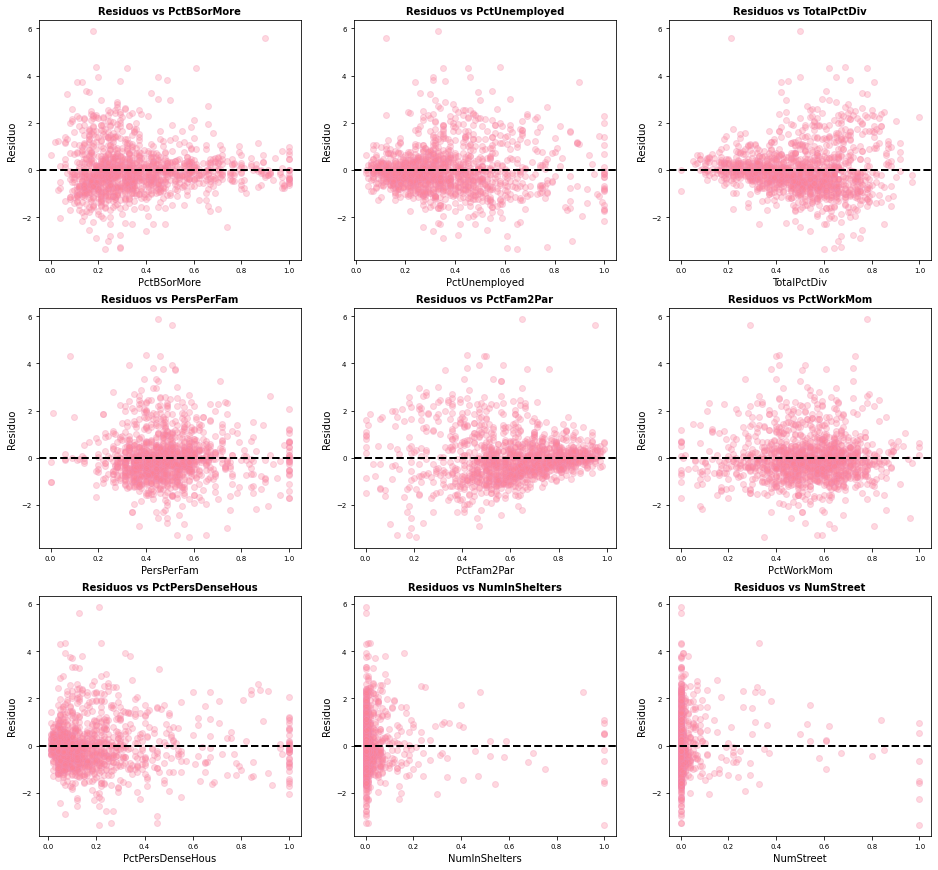

In [720]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 15))
col = cols[19]
axes[0,0].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[0,0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0,0].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[0,0].set_xlabel(f'{col}')
axes[0,0].set_ylabel('Residuo')
axes[0,0].tick_params(labelsize = 7)

### 2
col = cols[20]
axes[0,1].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[0,1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0,1].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[0,1].set_xlabel(f'{col}')
axes[0,1].set_ylabel('Residuo')
axes[0,1].tick_params(labelsize = 7)

### 3
col = cols[21]
axes[0,2].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[0,2].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0,2].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[0,2].set_xlabel(f'{col}')
axes[0,2].set_ylabel('Residuo')
axes[0,2].tick_params(labelsize = 7)

### 4
col = cols[22]
axes[1,0].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[1,0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1,0].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[1,0].set_xlabel(f'{col}')
axes[1,0].set_ylabel('Residuo')
axes[1,0].tick_params(labelsize = 7)

### 5
col = cols[23]
axes[1,1].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[1,1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1,1].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[1,1].set_xlabel(f'{col}')
axes[1,1].set_ylabel('Residuo')
axes[1,1].tick_params(labelsize = 7)

### 6
col = cols[24]
axes[1,2].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[1,2].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1,2].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[1,2].set_xlabel(f'{col}')
axes[1,2].set_ylabel('Residuo')
axes[1,2].tick_params(labelsize = 7)

### 7
col = cols[25]
axes[2,0].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[2,0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2,0].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[2,0].set_xlabel(f'{col}')
axes[2,0].set_ylabel('Residuo')
axes[2,0].tick_params(labelsize = 7)
### 8
col = cols[26]
axes[2,1].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[2,1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2,1].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[2,1].set_xlabel(f'{col}')
axes[2,1].set_ylabel('Residuo')
axes[2,1].tick_params(labelsize = 7)

### 9
col = cols[27]
axes[2,2].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[2,2].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2,2].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[2,2].set_xlabel(f'{col}')
axes[2,2].set_ylabel('Residuo')
axes[2,2].tick_params(labelsize = 7)

conclusion: 
junto con analisis de correlacion podemos ver que Numstretc etc no tienen mucha correlacion con el numero de crimiens violentos y tmbien podemos ver en la grafica de residuos que la varianza no es constante, la relacion no es lineal.

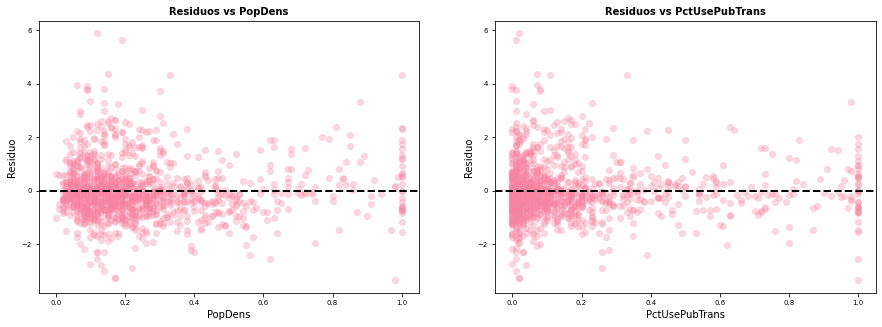

In [721]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
col = cols[28]
axes[0].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[0].set_xlabel(f'{col}')
axes[0].set_ylabel('Residuo')
axes[0].tick_params(labelsize = 7)

### 2
col = cols[29]
axes[1].scatter(X[col], residuos_studentizados,color = '#ff8095',
                   edgecolors='#F190B7', alpha = 0.3)
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title(f'Residuos vs {col}', fontsize = 10, fontweight = "bold")
axes[1].set_xlabel(f'{col}')
axes[1].set_ylabel('Residuo')
axes[1].tick_params(labelsize = 7)

## Forward selection

In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; **models with lower BIC are generally preferred**. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.


Given a set of candidate models for the data, **the preferred model is the one with the minimum AIC value**. Thus, AIC rewards goodness of fit (as assessed by the likelihood function), but it also includes a penalty that is an increasing function of the number of estimated parameters. The penalty discourages overfitting, which is desired because increasing the number of parameters in the model almost always improves the goodness of the fit.

**Adjusted R-squared** is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared.

Adding more independent variables or predictors to a regression model tends to increase the R-squared value, which tempts makers of the model to add even more variables. This is called overfitting and can return an unwarranted high R-squared value. Adjusted R-squared is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables.

In [ ]:
def forward_selected(data, response,evaluation_metric='r_squared_adj'):
    
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    l_cols = list(data.columns)
    random.shuffle(l_cols)
    remaining = l_cols # empezamos con todas las variables (modelo completo)
    remaining.remove(response) # quitamos la y 
    selected = []
    current_score, best_new_score = 0.0, 0.0 # inicializamos el score
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            if evaluation_metric == 'r_squared_adj':
                score = smf.ols(formula, data).fit().rsquared_adj
                scores_with_candidates.sort() # ordenamos de menor a mayor
            if evaluation_metric == 'r_squared':
                score = smf.ols(formula, data).fit().rsquared
                scores_with_candidates.sort()
            scores_with_candidates.append((score, candidate))
         
        best_new_score, best_candidate = scores_with_candidates.pop()
        print("____best_candidate____:", best_candidate,'_score: ',score)
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            print("______selected____:", best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    # ya nos salimos del while
    model = smf.ols(formula, data).fit()
    return model

#### experimentos con forward selection

In [548]:
# 1er experimento:
best_model_radj = forward_selected(data,'ViolentCrimesPerPop',evaluation_metric='r_squared_adj')

____best_candidate____: medIncome _score:  0.17637623266202562
______selected____: medIncome
____best_candidate____: agePct16t24 _score:  0.17716444018450872
______selected____: agePct16t24
____best_candidate____: AsianPerCap _score:  0.17963784643823433
______selected____: AsianPerCap
____best_candidate____: whitePerCap _score:  0.2530555830603656
______selected____: whitePerCap
____best_candidate____: racePctHisp _score:  0.32106099129527066
______selected____: racePctHisp
____best_candidate____: HispPerCap _score:  0.32072992542260903


____best_candidate____: OtherPerCap _score:  0.02232045613067357
______selected____: OtherPerCap
____best_candidate____: agePct12t21 _score:  0.02185748178114344

In [549]:
# 2ndo experimento
best_model_radj = forward_selected(data,'ViolentCrimesPerPop',evaluation_metric='r_squared_adj')

____best_candidate____: PctWorkMom _score:  0.020877005554566952
______selected____: PctWorkMom
____best_candidate____: PersPerFam _score:  0.024285373739038274
______selected____: PersPerFam
____best_candidate____: agePct65up _score:  0.04723922219116217
______selected____: agePct65up
____best_candidate____: NumInShelters _score:  0.18543134205950818
______selected____: NumInShelters
____best_candidate____: PopDens _score:  0.2110123144396011
______selected____: PopDens
____best_candidate____: blackPerCap _score:  0.2708611969879998
______selected____: blackPerCap
____best_candidate____: racePctWhite _score:  0.5400490931782216
______selected____: racePctWhite
____best_candidate____: PctPopUnderPov _score:  0.5476084508674794
______selected____: PctPopUnderPov
____best_candidate____: indianPerCap _score:  0.5473767678108892


____best_candidate____: PctPopUnderPov _score:  0.26536389412504957
______selected____: PctPopUnderPov
____best_candidate____: perCapInc _score:  0.26637591550601425
______selected____: perCapInc
____best_candidate____: indianPerCap _score:  0.2670272087141803
______selected____: indianPerCap
____best_candidate____: medIncome _score:  0.27290637148426256
______selected____: medIncome
____best_candidate____: householdsize _score:  0.2756229222984724
______selected____: householdsize
____best_candidate____: PctFam2Par _score:  0.5498120918846932
______selected____: PctFam2Par
____best_candidate____: agePct12t29 _score:  0.5567787832147277
______selected____: agePct12t29
____best_candidate____: NumInShelters _score:  0.5776646638631968
______selected____: NumInShelters
____best_candidate____: TotalPctDiv _score:  0.5845797652432421
______selected____: TotalPctDiv
____best_candidate____: blackPerCap _score:  0.5843364318505614

In [550]:
print(best_model_radj.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.550
Model:                             OLS   Adj. R-squared:                  0.548
Method:                  Least Squares   F-statistic:                     202.8
Date:                 Sun, 29 May 2022   Prob (F-statistic):          6.14e-224
Time:                         11:40:48   Log-Likelihood:                 551.34
No. Observations:                 1335   AIC:                            -1085.
Df Residuals:                     1326   BIC:                            -1038.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7130      0.0

In [551]:
# 3er experimento
best_model_radj = forward_selected(data,'ViolentCrimesPerPop',evaluation_metric='r_squared_adj')

____best_candidate____: medIncome _score:  0.17637623266202562
______selected____: medIncome
____best_candidate____: HispPerCap _score:  0.17697475278289043
______selected____: HispPerCap
____best_candidate____: agePct16t24 _score:  0.17751935463884738
______selected____: agePct16t24
____best_candidate____: OtherPerCap _score:  0.17855263156794654
______selected____: OtherPerCap
____best_candidate____: racePctHisp _score:  0.23007926504518283
______selected____: racePctHisp
____best_candidate____: agePct12t29 _score:  0.23180889505797553
______selected____: agePct12t29
____best_candidate____: PopDens _score:  0.2750736995664361
______selected____: PopDens
____best_candidate____: PctUsePubTrans _score:  0.30054772728373236
______selected____: PctUsePubTrans
____best_candidate____: TotalPctDiv _score:  0.4337613573484137
______selected____: TotalPctDiv
____best_candidate____: PctPersDenseHous _score:  0.48074411407447293
______selected____: PctPersDenseHous
____best_candidate____: PctNot

In [552]:
print(best_model_radj.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.527
Model:                             OLS   Adj. R-squared:                  0.522
Method:                  Least Squares   F-statistic:                     105.0
Date:                 Sun, 29 May 2022   Prob (F-statistic):          7.75e-203
Time:                         11:41:04   Log-Likelihood:                 516.91
No. Observations:                 1334   AIC:                            -1004.
Df Residuals:                     1319   BIC:                            -925.9
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.2443   

In [553]:
best_model_rsquared = forward_selected(data,'ViolentCrimesPerPop',evaluation_metric='r_squared')

____best_candidate____: state _score:  0.037361861813622554
______selected____: state
____best_candidate____: PersPerFam _score:  0.048390089777374024
______selected____: PersPerFam
____best_candidate____: PctNotHSGrad _score:  0.2511381649894191
______selected____: PctNotHSGrad
____best_candidate____: racePctAsian _score:  0.26193527105369563
______selected____: racePctAsian
____best_candidate____: agePct12t29 _score:  0.2738701343743897
______selected____: agePct12t29
____best_candidate____: indianPerCap _score:  0.2738706932831849
______selected____: indianPerCap
____best_candidate____: PctUsePubTrans _score:  0.313968824145311
______selected____: PctUsePubTrans
____best_candidate____: PctLess9thGrade _score:  0.3434942425510171
______selected____: PctLess9thGrade
____best_candidate____: whitePerCap _score:  0.35540516811104883
______selected____: whitePerCap
____best_candidate____: HispPerCap _score:  0.36123617003607533
______selected____: HispPerCap
____best_candidate____: PctWor

In [554]:
print(best_model_rsquared.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.659
Model:                             OLS   Adj. R-squared:                  0.651
Method:                  Least Squares   F-statistic:                     76.24
Date:                 Sun, 29 May 2022   Prob (F-statistic):          1.56e-276
Time:                         11:41:44   Log-Likelihood:                 735.59
No. Observations:                 1334   AIC:                            -1403.
Df Residuals:                     1300   BIC:                            -1227.
Df Model:                           33                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6919   

**Conclusiones:**
El resultado que obtenemos al realizar selección de variables por medio de selección hacia adelante nos indica que depende mucho del orden en que las variables se vayan escogiendo, tal como se muestra en los resultados de 3 experiementos donde ejecutamos el algoritmo de selección hacia adelante con un lista aleatoria de variables explicativas en cada uno de los experimentos y obtuvimos resultados diferentes. (explayarnos mencionando que resultados). 
Por lo que decidimos no utilizar este criterio para seleccionar a los regresores que usaremos en el modelo, dado que para obtener el mejor conjunto de regresores tendríamos un problema computacionalmente costoso. 

## Detección de puntos extremos

OLSResults.get_influence()
- The instance containing methods to calculate the main influence and outlier measures for the OLS regression.

### detección de extremos en las x's

In [555]:
hii=influence.hat_matrix_diag

In [556]:
hii

array([0.02370793, 0.02010934, 0.05103598, ..., 0.00871438, 0.02345481,
       0.02073234])

In [557]:
# dimension de matriz gorrito nxn, n = 1334
hii.shape

(1334,)

In [558]:
extremos_x = np.where(hii > 2*(p/n))[0]

In [559]:
extremos_x

array([   2,    3,   34,   50,   63,   69,   75,   86,  100,  102,  122,
        132,  145,  148,  162,  168,  177,  182,  193,  204,  205,  207,
        214,  216,  227,  229,  231,  254,  264,  270,  274,  284,  291,
        300,  324,  333,  337,  342,  353,  356,  386,  411,  421,  425,
        463,  472,  479,  484,  494,  552,  579,  586,  588,  596,  597,
        633,  642,  652,  719,  735,  737,  743,  771,  773,  781,  789,
        790,  811,  813,  816,  855,  863,  925,  952,  957,  988,  994,
        996, 1000, 1022, 1024, 1038, 1049, 1067, 1075, 1090, 1093, 1095,
       1189, 1192, 1198, 1227, 1237, 1239, 1244, 1249, 1262, 1268, 1271,
       1274, 1286, 1290, 1294, 1300, 1325, 1326])

## Detección de puntos influyentes

### Detección de puntos influyentes en las y´s

- DFFITS: identificación de puntos influyentes en las predicciones

punto influyente:
$$ |DFFITS| > 2 \sqrt{\frac{p}{n}}$$

In [560]:
DFFITS = influence.dffits[0]

In [561]:
DFFITS

array([ 0.00318283,  0.04464215,  0.02156135, ...,  0.01358797,
        0.1065781 , -0.11602637])

In [562]:
#calculate DFBETAS threshold value
thresh = 2*(p/n)**(1/2)

In [563]:
puntos_influeyentes = np.where(np.abs(DFFITS)>thresh)[0]

In [564]:
puntos_influeyentes

array([  40,   41,   51,   56,   60,   69,   88,   89,  101,  102,  111,
        144,  145,  162,  166,  168,  177,  180,  187,  189,  204,  209,
        211,  216,  230,  235,  272,  291,  295,  300,  321,  324,  342,
        346,  348,  371,  377,  380,  383,  411,  434,  444,  452,  457,
        461,  472,  479,  480,  507,  521,  532,  555,  570,  579,  586,
        588,  595,  614,  625,  633,  635,  649,  712,  789,  796,  802,
        805,  813,  816,  825,  849,  863,  869,  939,  951,  952,  968,
        996, 1023, 1047, 1049, 1068, 1074, 1114, 1115, 1142, 1163, 1178,
       1189, 1192, 1231, 1237, 1246, 1249, 1274, 1275, 1286])

AttributeError: 'numpy.ndarray' object has no attribute 'index'

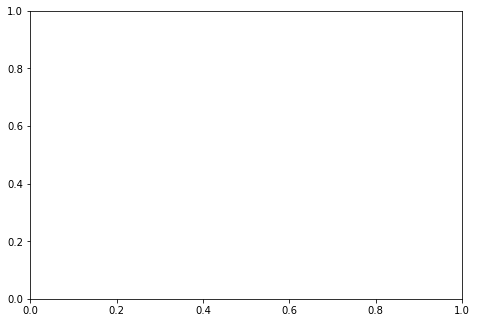

In [565]:
fig, ax = plt.subplots(figsize=(6,4))
ax=fig.add_axes([0,0,1,1])

ax.scatter(DFF[0].index, DFF[0].values, color='b')

plt.plot((0, 140), (thresh, thresh), 'k-')
plt.plot((0, 140), (-thresh, -thresh), 'k-')

plt.plot((0, 140), (1, 1), 'k-')
plt.plot((0, 140), (-1, -1), 'k-')

## puntos extremos e influeyentes

In [566]:
extremos_influyentes = set(extremos_x).intersection(set(puntos_influeyentes))

In [567]:
extremos_influyentes = list(extremos_influyentes)

In [568]:
preds = prediccion_train.reset_index(drop=True)
res = residuos_train.reset_index(drop=True)

In [569]:
max(extremos_influyentes)

1286

In [570]:
preds = pd.DataFrame(prediccion_train.copy()).set_index([pd.Index(list(range(prediccion_train.shape[0])))])
res = pd.DataFrame(residuos_train.copy()).set_index([pd.Index(list(range(residuos_train.shape[0])))])

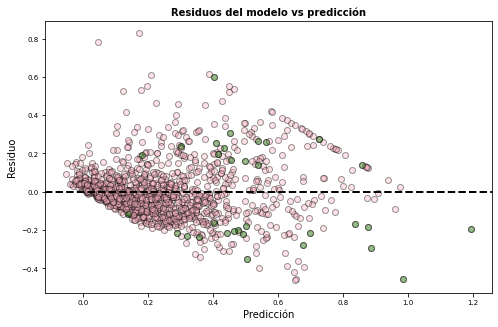

In [571]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(prediccion_train, residuos_train,color = '#FFB7C5',
                   edgecolors=(0, 0, 0), alpha = 0.4)
ax.scatter(preds.loc[extremos_influyentes],res.loc[extremos_influyentes],color = '#008000',
                   edgecolors=(0, 0, 0), alpha = 0.4)
ax.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
ax.set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
ax.set_xlabel('Predicción')
ax.set_ylabel('Residuo')
ax.tick_params(labelsize = 7)

In [572]:
# faltan dos extremos para ver si son influyentes

### Detección de puntos influyentes en las x´s

In [573]:
betas = influence.dfbetas

In [574]:
betas = pd.DataFrame(influence.dfbetas)
betas

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.000196,0.000043,0.000207,-0.000031,0.000036,-0.000428,-0.000033,-0.000079,0.000441,0.000328,...,0.000251,-0.000223,0.000130,-0.000283,-7.320649e-07,0.000062,0.000218,-0.000067,0.000617,-0.001299
1,0.000089,-0.000782,-0.000013,-0.005784,0.001628,0.003967,0.014273,-0.002003,-0.004138,0.001628,...,-0.007158,-0.002677,0.005440,-0.010819,-1.883100e-04,-0.020400,0.004438,-0.007614,0.013839,-0.004844
2,-0.001298,-0.000090,-0.001334,0.000350,0.000367,-0.002966,-0.002575,0.000135,0.001702,0.004211,...,0.000019,0.001198,0.001936,-0.000686,2.991329e-04,0.002057,0.000151,0.000392,-0.001657,0.000875
3,0.000948,0.000062,0.003822,0.000077,0.000755,0.000351,0.000593,-0.003250,-0.004178,-0.001378,...,0.000606,-0.002457,-0.005810,0.000493,2.644063e-03,0.000450,0.000116,-0.000097,0.001740,0.000594
4,-0.013375,0.000945,-0.014684,0.011034,0.002773,0.004883,0.002840,0.009613,0.012659,0.008053,...,0.004183,0.018222,0.013128,0.014020,-6.357629e-03,0.002584,0.001876,-0.003350,-0.012970,0.005913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,-0.000567,0.014104,0.013851,-0.011952,0.002209,-0.014694,-0.004428,-0.015230,-0.000078,0.006227,...,-0.004575,-0.001900,-0.003753,-0.016478,1.669628e-02,0.005639,-0.012685,0.005173,0.004743,0.003771
1330,0.009593,-0.002322,0.001227,-0.004080,0.000298,0.001434,-0.005348,-0.006997,-0.015527,-0.006357,...,-0.000220,-0.002106,0.002566,-0.011016,-6.904220e-03,-0.001268,-0.002335,0.002454,-0.008964,0.007414
1331,-0.001597,-0.000158,-0.001695,0.000414,-0.000546,0.000111,0.001990,-0.000200,0.003056,-0.000334,...,-0.002514,-0.000801,0.001529,0.002696,2.252060e-03,-0.001466,0.001181,-0.000610,0.004566,-0.003821
1332,-0.008456,0.006510,0.007193,0.010663,0.003920,0.063937,0.031129,0.003647,0.020624,-0.007264,...,0.006957,0.010680,-0.004233,0.007751,1.643390e-02,-0.025355,-0.011798,-0.002152,-0.025941,0.037292


In [575]:
thresh = 2/(n**(1/2))

In [576]:
mask = np.abs(betas) > thresh

In [577]:
betas_influyentes = betas[mask]

In [578]:
betas_influyentes.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [579]:
df_betaski = []
for i in betas_influyentes.columns:
    df_betaski.append(betas_influyentes.iloc[np.where(~np.isnan(betas_influyentes[i]))].index)

In [580]:
dfbetas_extremos = []
for i in range(len(df_betaski)):
    dfbetas_extremos.append(set(df_betaski[i]).intersection(set(extremos_x)))

In [581]:
print("numero de puntos extremos y puntos influeyentes en los coef",len(list(set().union(*dfbetas_extremos))))

numero de puntos extremos y puntos influeyentes en los coef 72


In [582]:
len(betas.columns[:8])

8

In [587]:
colors = ['#F9CEEE','#F9F3EE','#CCF3EE','#97C4B8','#FBD6D2','#F190B7','#CE49BF','#A63EC5']

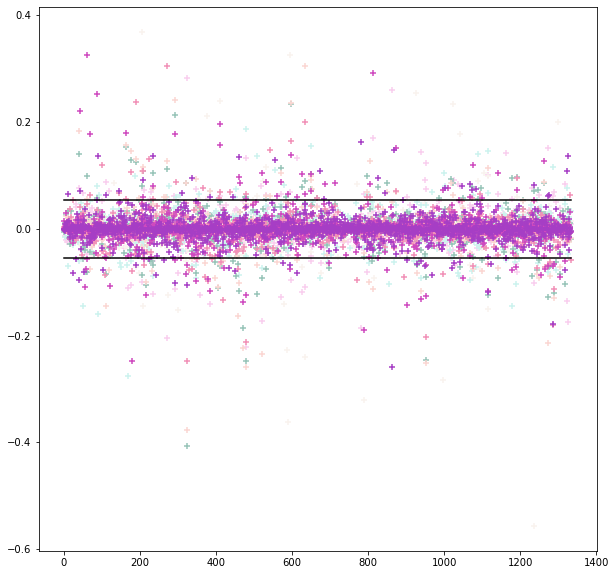

In [589]:
# esto lo podremos analizar después de la selección de variables
fig, ax = plt.subplots(figsize=(10,10))
for i in range(len(betas.columns[:8])):
    plt.scatter(betas.index,betas.loc[:,[i]], color= colors[i], marker = "+")

plt.plot((0, len(betas.index)), (thresh, thresh), 'k-')
plt.plot((0, len(betas.index)), (-thresh, -thresh), 'k-')

### eliminación de puntos extremos e influyentes en las betas

### eliminación de puntos extremos e influyentes en las y´s

## test for normality
- normalidad en los residuos

### Shapiro-Wilk
- The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [590]:
import scipy

In [591]:
shapiro_test = scipy.stats.shapiro(residuos_train)

In [592]:
shapiro_test.pvalue

3.3064043824421188e-24

Esta valor del p-value nos indica que rechazamos la hipótesis nula, es decir, los datos no vienen de una distribución normal. 

### Anderson-Darling test
Anderson-Darling test tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.


If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected

In [593]:
scipy.stats.anderson(residuos_train, dist='norm')

AndersonResult(statistic=24.817595628430354, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### Kolmogorov-Smirnov test
The one-sample test compares the underlying distribution F(x) of a sample against a given distribution G(x). . The two-sample test compares the underlying distributions of two independent samples. Both tests are valid only for continuous distributions.

In [594]:
scipy.stats.kstest(residuos_train, 'norm')

KstestResult(statistic=0.38412471460101877, pvalue=1.4090015650487084e-177)

### Breusch-Pagan Lagrange Multiplier 
- test for heteroscedasticity
- The tests the hypothesis that the residual variance does not depend on the variables in x

In [595]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(dummy_model.resid, dummy_model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 145.34398794381065),
 ('p-value', 1.9569802946841097e-17),
 ('f-value', 5.498199251533591),
 ('f p-value', 1.2898252752168967e-18)]

###  Goldfeld–Quandt test 
- checks for homoscedasticity in regression analyses. 
- Goldfeld-Quandt homoskedasticity test. This test examines whether the residual variance is the same in 2 subsamples.
- p-value of the hypothesis that the variance in one subsample is larger than in the other subsample. 
- The Null hypothesis is that the variance in the two sub-samples are the same. The alternative hypothesis, can be increasing, i.e. the variance in the second sample is larger than in the first, or decreasing or two-sided.

In [596]:
# Goldfeld-Quandt test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(dummy_model.resid, dummy_model.model.exog)
lzip(name, test)

[('F statistic', 0.7865072195915584), ('p-value', 0.9987600476386058)]

In [597]:
# linearity
name = ["t value", "p value"]
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', nan), ('p value', nan)]

### graficamos los supuestos

#### grafica de resiudos vs prediccion

Text(0, 0.5, 'resid')

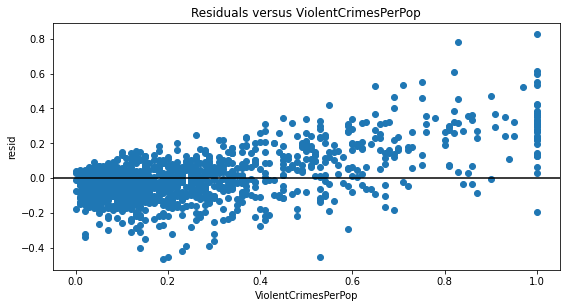

In [598]:
endog_idx = 'msrp'
fig = None
fig = utils.create_mpl_fig(fig,figsize=(20, 10))
#exog_name, exog_idx = utils.maybe_name_or_idx(exog_idx, modelo_sin_extremos.model)
results = maybe_unwrap_results(dummy_model)

y_name = results.model.endog_names
x1 = results.model.endog[:,]
ax = fig.add_subplot(2, 2, 2)
ax.plot(x1, results.resid, 'o')
ax.axhline(y=0, color='black')
ax.set_title('Residuals versus %s' % y_name, fontsize='large')
ax.set_xlabel(y_name)
ax.set_ylabel("resid")

In [ ]:
# residuos 
# quito extremos
# hasta aqui mejor informacion
# supuestos
# tranformo

# Transformaciónes

## cox-box

In [649]:
mask = prediccion_train>0
prediccion_train[mask]#(x**lmbda - 1) / lmbda
fitted_data, fitted_lambda = stats.boxcox(prediccion_train[mask].values)
fitted_lambda

0.33058008513100956

In [650]:
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[1])

<AxesSubplot:ylabel='Density'>

In [632]:
def cox_box_transf(x,fitted_lambda=0.37390702513450985):
    return (x**fitted_lambda-1)/fitted_lambda

In [653]:
# Modelo después de transformacion (Rebe)
f_cox_box = 'cox_box_transf(ViolentCrimesPerPop) ~  population + householdsize + racepctblack + racePctWhite + racePctAsian + racePctHisp + agePct12t21 + agePct12t29 + agePct16t24 + agePct65up + medIncome + perCapInc + whitePerCap + blackPerCap+ indianPerCap + AsianPerCap + OtherPerCap + HispPerCap + PctPopUnderPov + PctLess9thGrade + PctNotHSGrad + PctBSorMore+ PctUnemployed + TotalPctDiv + PersPerFam + PctFam2Par + PctWorkMom + PctPersDenseHous + NumInShelters + NumStreet+ PopDens + PctUsePubTrans'

In [654]:
y, X = dmatrices(f_cox_box, data, return_type='dataframe')
cox_box_model = sm.OLS(y, X).fit()

In [655]:
prediccion_cox_box = cox_box_model.predict(X)

In [656]:
residuos_cox_box = cox_box_model.resid

<AxesSubplot:ylabel='Density'>

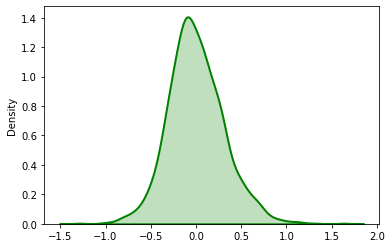

In [657]:
sns.distplot(residuos_cox_box, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green")

## transformaciones variables

population -> 1/x
racePCTAsian -> x^2
racePCTHisp -> x^2
medIncome -> 1/x, log(x), -log(x)
PctNotHighGHrad -> -8.5(x-0.5)^(2)+2
PctLess9grth -> -8.5(x-0.4)^(2)+2
PctBsorMore -> 1/x, log(x), -log(x)
TotalPctDiv -> exp, -exp
PersPerFam -> -8.5 (x-0.5)^(2)+2
PctWorkMom -> -8.5 (x-0.5)^(2)+2
PobDense -> (x-0.5)^(2)
TransPob -> (x-0.5)^(2)
quitamos streetpeople y numshelter

# Interpretacion de los coeficientes

0.37390702513450985

<AxesSubplot:ylabel='Density'>

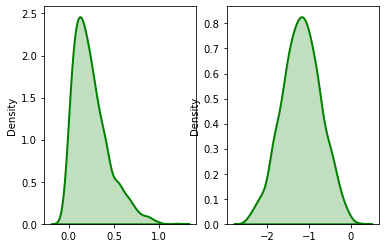

In [613]:
fig, ax = plt.subplots(1, 2)
sns.distplot(prediccion_train, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[1])

array([-2.08986762, -0.69664882, -1.768628  , ..., -1.50477496,
       -1.02745561, -1.00827484])

# Predicciones

In [ ]:
# cargamos el test de pruebas

In [ ]:
# hacemos la prediccion con el mejor modelo

In [ ]:
# intervalos de prediccion